In [1]:
#%config  {"Enclave": "test_hub", "SubEnclave": ""}

User: shifa
Hub Enclave: test_hub
Sub Enclave :


In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

import time
from subprocess import check_output


OUTPUT:



In [4]:
data = pd.read_csv('/data/local_data.csv')
dh = data.head()
print(dh.to_string())


OUTPUT:
   Unnamed: 0        id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst  Unnamed: 32
0         451   9111805         M        19.59         25.00          127.70     1191.0          0.10320           0.09871         0.16550              0.09063         0.1663                 0.05391     0.4674       1.375         2.916    56.18       0.011900         0.01929       0.04907            0.01499      0.01641              0.001807         21.44          30.96           139.80      1421.0           0.15280             0.1845           0.3977    

In [5]:
col = data.columns       # .columns gives columns names in data 
print(col)


OUTPUT:
Index([u'Unnamed: 0', u'id', u'diagnosis', u'radius_mean', u'texture_mean',
       u'perimeter_mean', u'area_mean', u'smoothness_mean',
       u'compactness_mean', u'concavity_mean', u'concave points_mean',
       u'symmetry_mean', u'fractal_dimension_mean', u'radius_se',
       u'texture_se', u'perimeter_se', u'area_se', u'smoothness_se',
       u'compactness_se', u'concavity_se', u'concave points_se',
       u'symmetry_se', u'fractal_dimension_se', u'radius_worst',
       u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave points_worst', u'symmetry_worst', u'fractal_dimension_worst',
       u'Unnamed: 32'],
      dtype='object')



In [11]:
# y includes our labels and x includes our features
y = data.diagnosis                          # M or B 
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
print(x.head().to_string())


OUTPUT:
   Unnamed: 0  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
0         451        19.59         25.00          127.70     1191.0          0.10320           0.09871         0.16550              0.09063         0.1663                 0.05391     0.4674       1.375         2.916    56.18       0.011900         0.01929       0.04907            0.01499      0.01641              0.001807         21.44          30.96           139.80      1421.0           0.15280             0.1845           0.3977               0.14660          0.2293                  0


OUTPUT:
('Number of Benign: ', 117)
('Number of Malignant : ', 70)



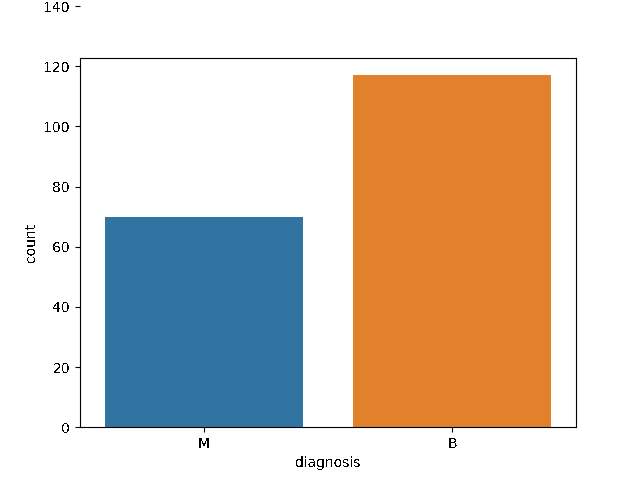

In [13]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)
plt.savefig("/data/plot.png")

In [15]:
print(x.describe().to_string())


OUTPUT:
       Unnamed: 0  radius_mean  texture_mean  perimeter_mean    area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean   radius_se  texture_se  perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst   area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
count   187.00000   187.000000    187.000000      187.000000   187.000000       187.000000        187.000000      187.000000           187.000000     187.000000              187.000000  187.000000  187.000000    187.000000  187.000000     187.000000      187.000000    187.000000         187.000000   187.000000            187.000000    187.000000     187.000000       187.000000   187.000000        187.000000         187.000000       187.000000            187.000000      187.000


OUTPUT:



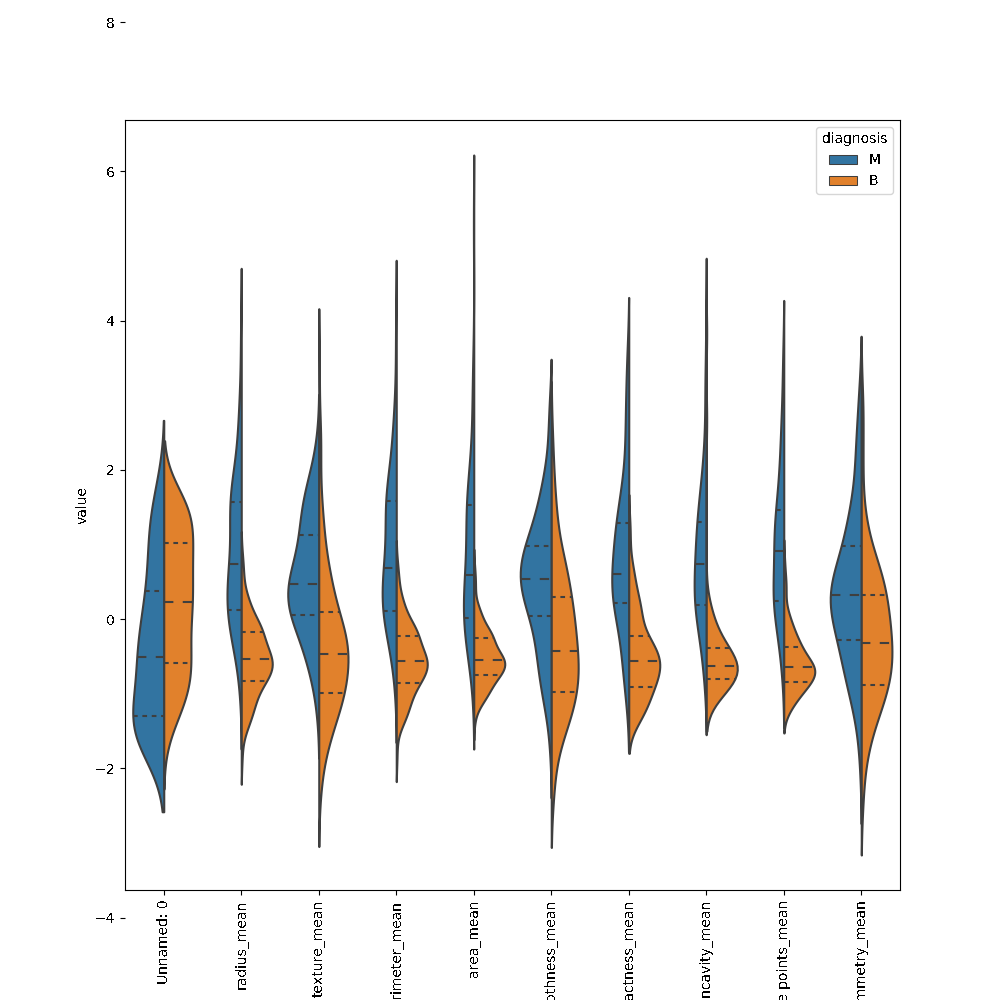

In [16]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.savefig("/data/plot.png")


OUTPUT:



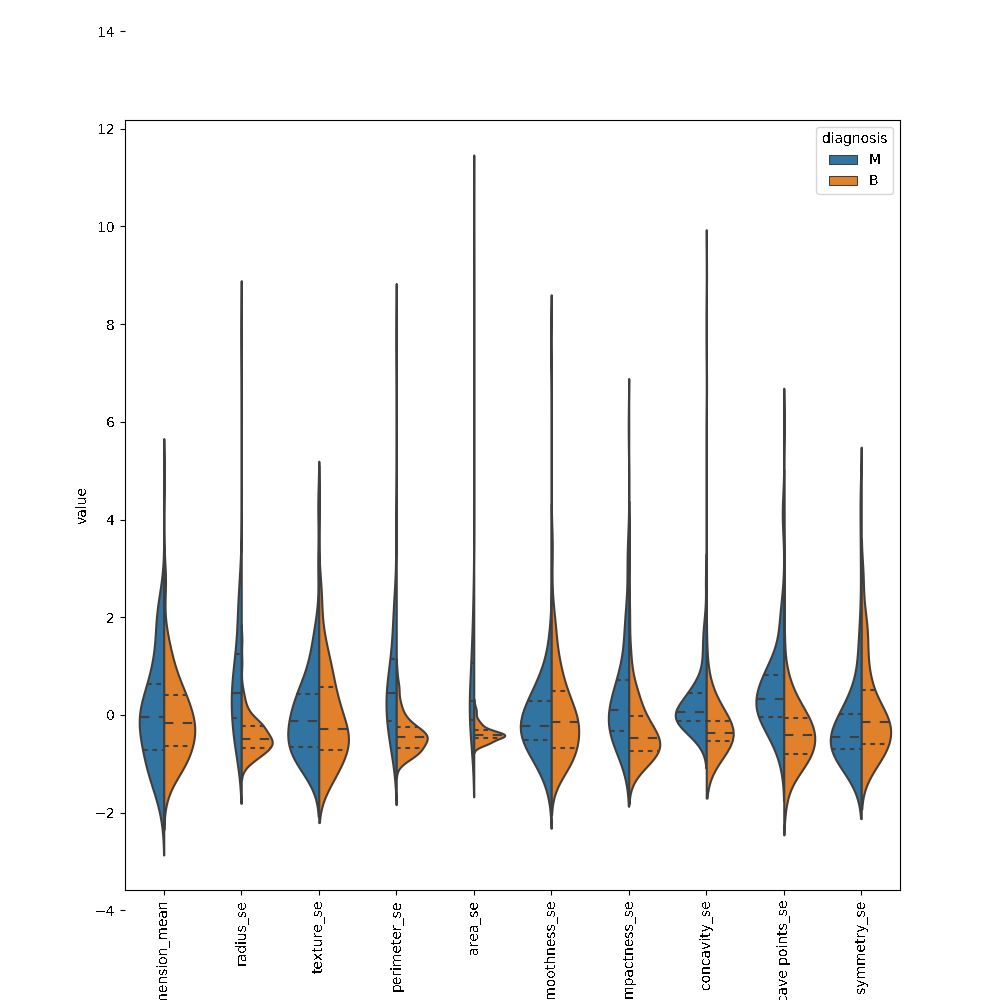

In [17]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.savefig("/data/plot.png")


OUTPUT:



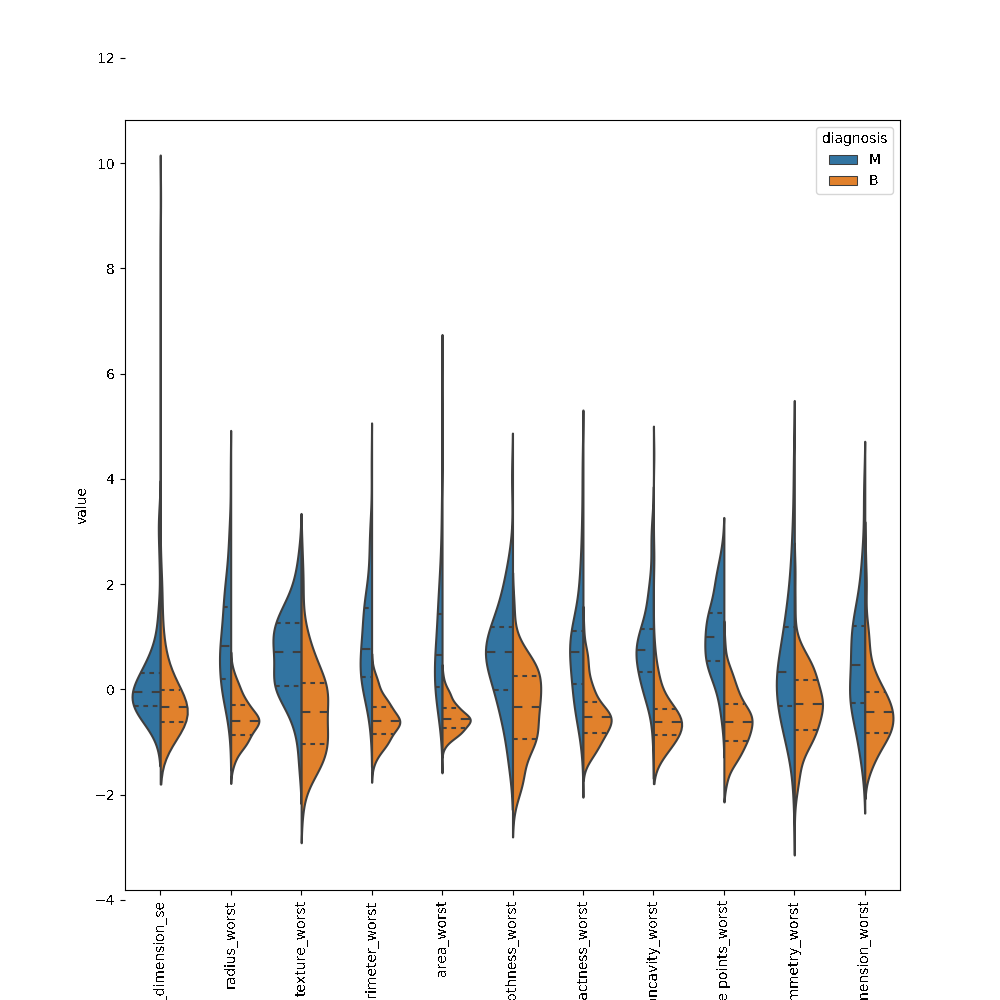

In [18]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.savefig("/data/plot.png")


OUTPUT:



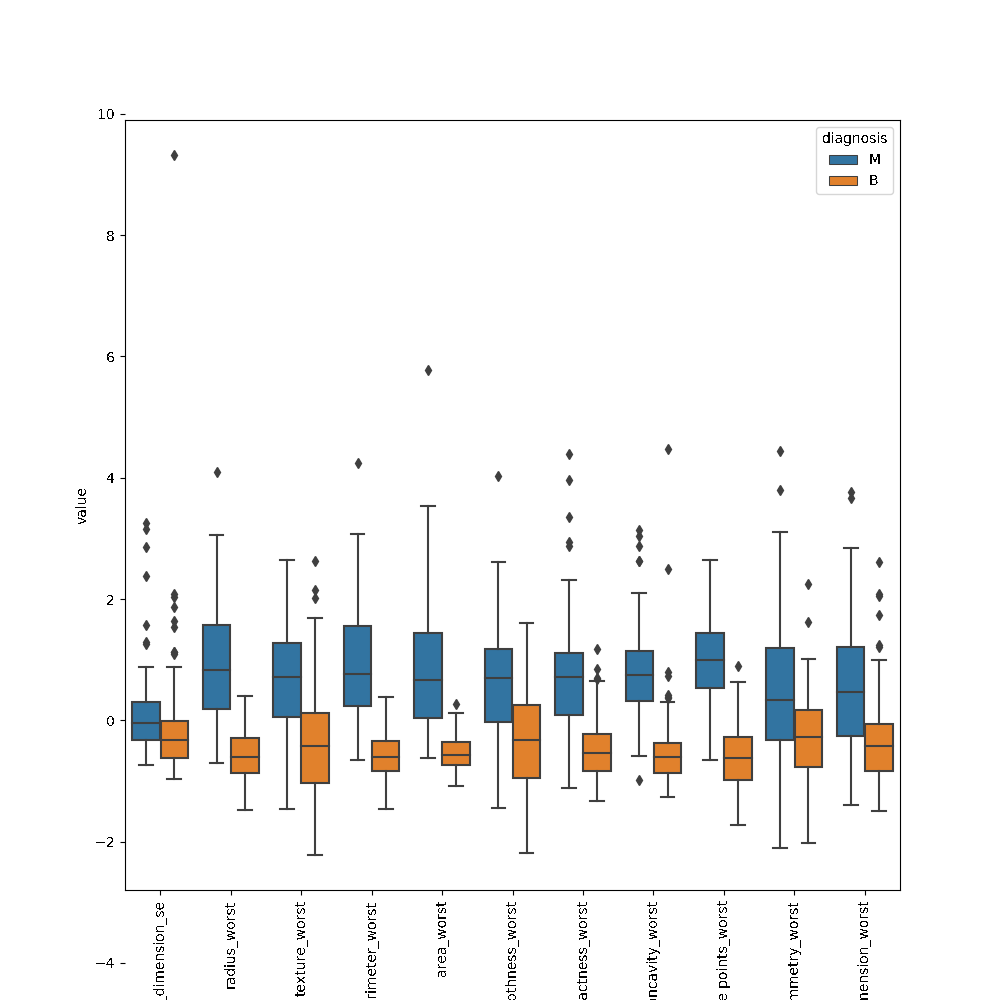

In [19]:
# As an alternative of violin plot, box plot can be used
# box plots are also useful in terms of seeing outliers
# I do not visualize all features with box plot
# In order to show you lets have an example of box plot
# If you want, you can visualize other features as well.
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
plt.savefig("/data/plot.png")


OUTPUT:



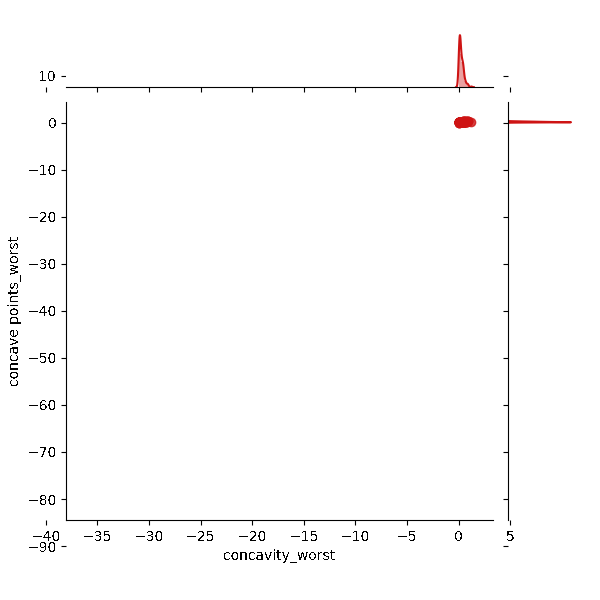

In [20]:
sns.jointplot(x.loc[:,'concavity_worst'], x.loc[:,'concave points_worst'], kind="regg", color="#ce1414")
plt.savefig("/data/plot.png")


OUTPUT:



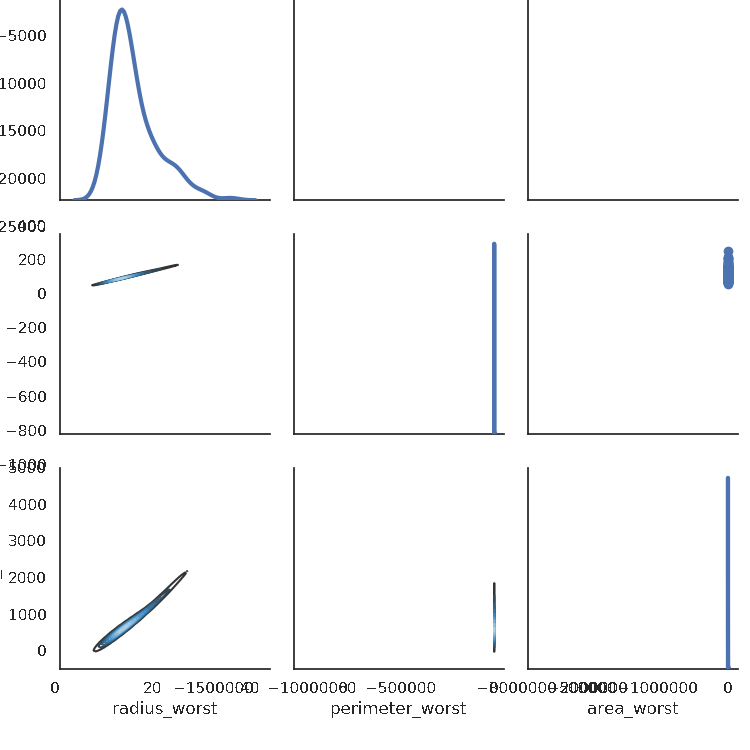

In [21]:
sns.set(style="white")
df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.savefig("/data/plot.png")


OUTPUT:



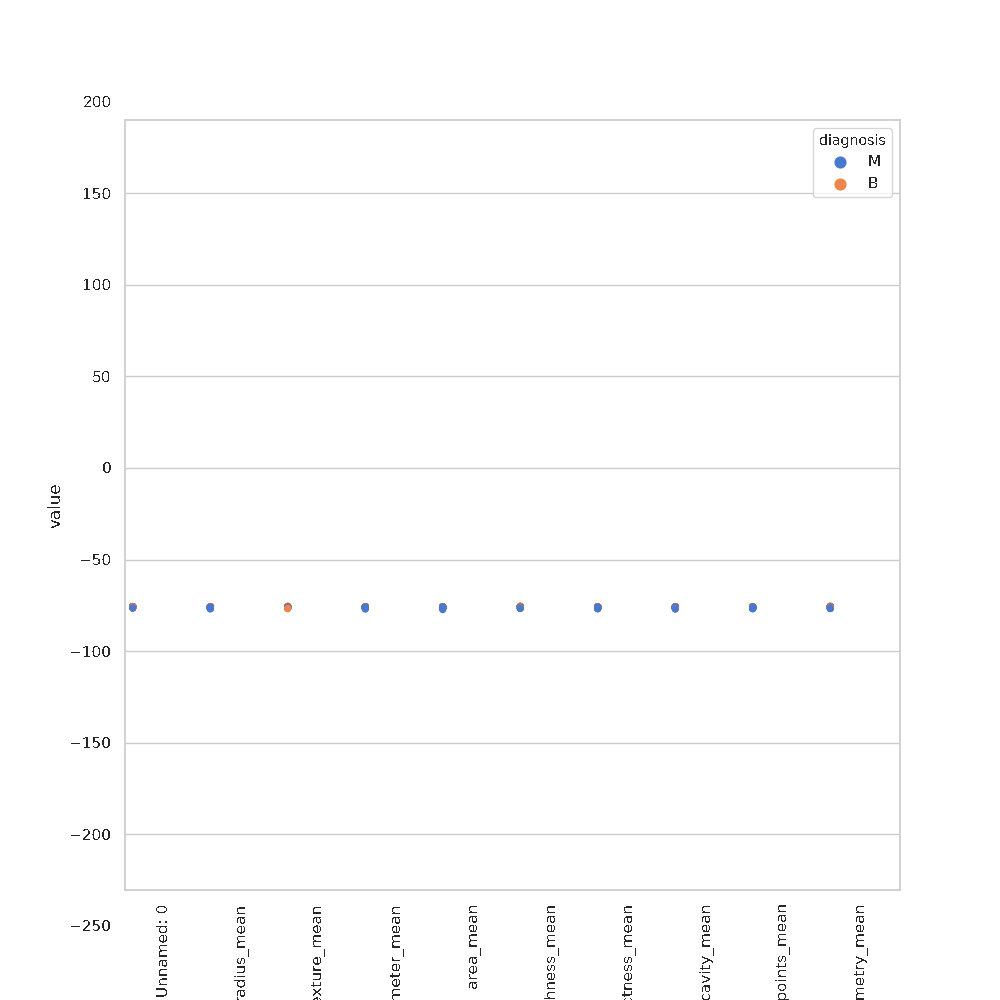

In [24]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)
plt.savefig("/data/plot.png")


OUTPUT:



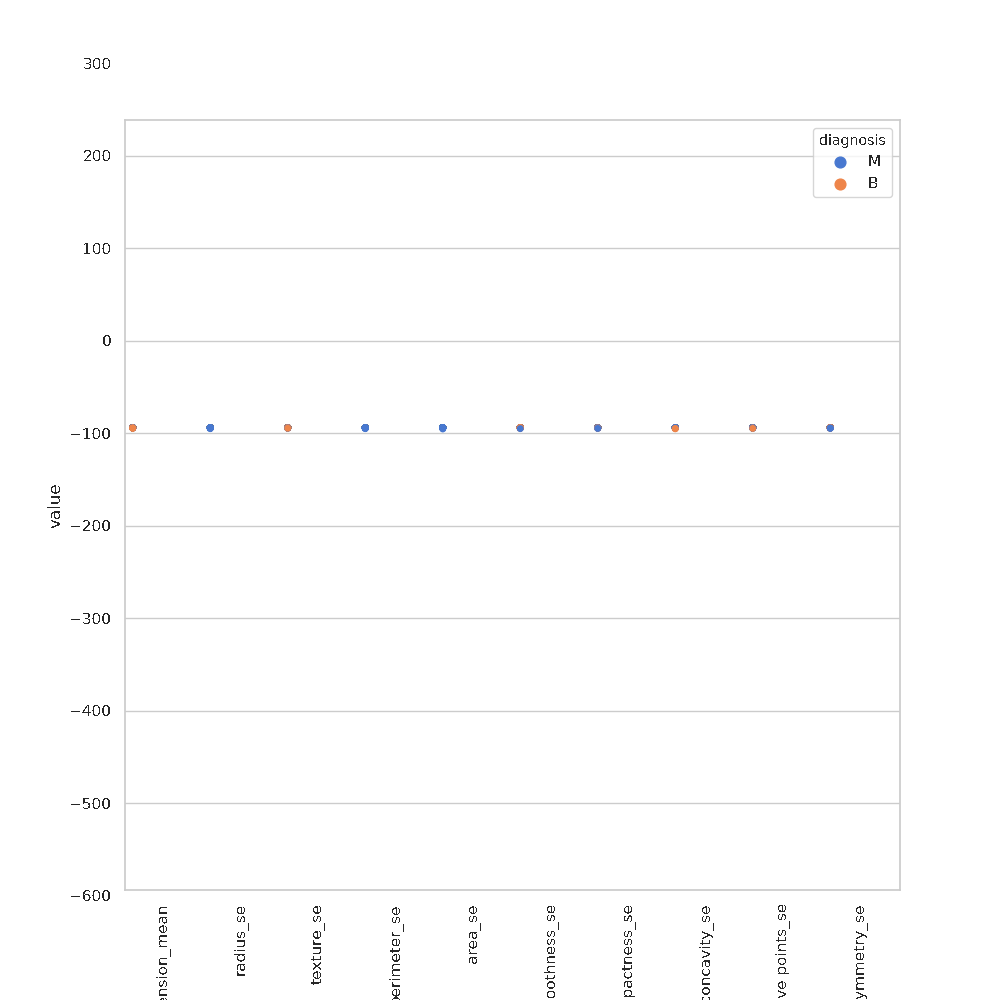

In [27]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
plt.savefig("/data/plot.png")


OUTPUT:
('swarm plot time: ', 140138424255077.98, ' s')



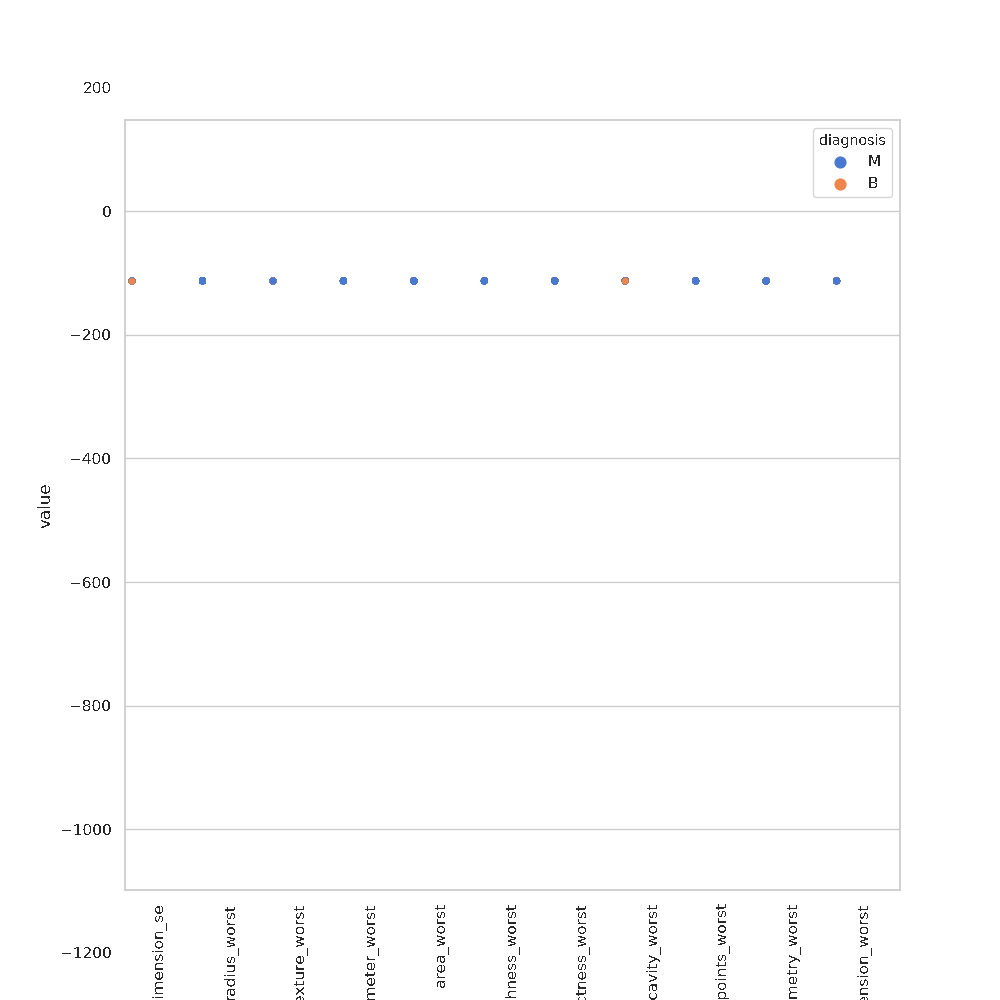

In [28]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")
plt.savefig("/data/plot.png")


OUTPUT:



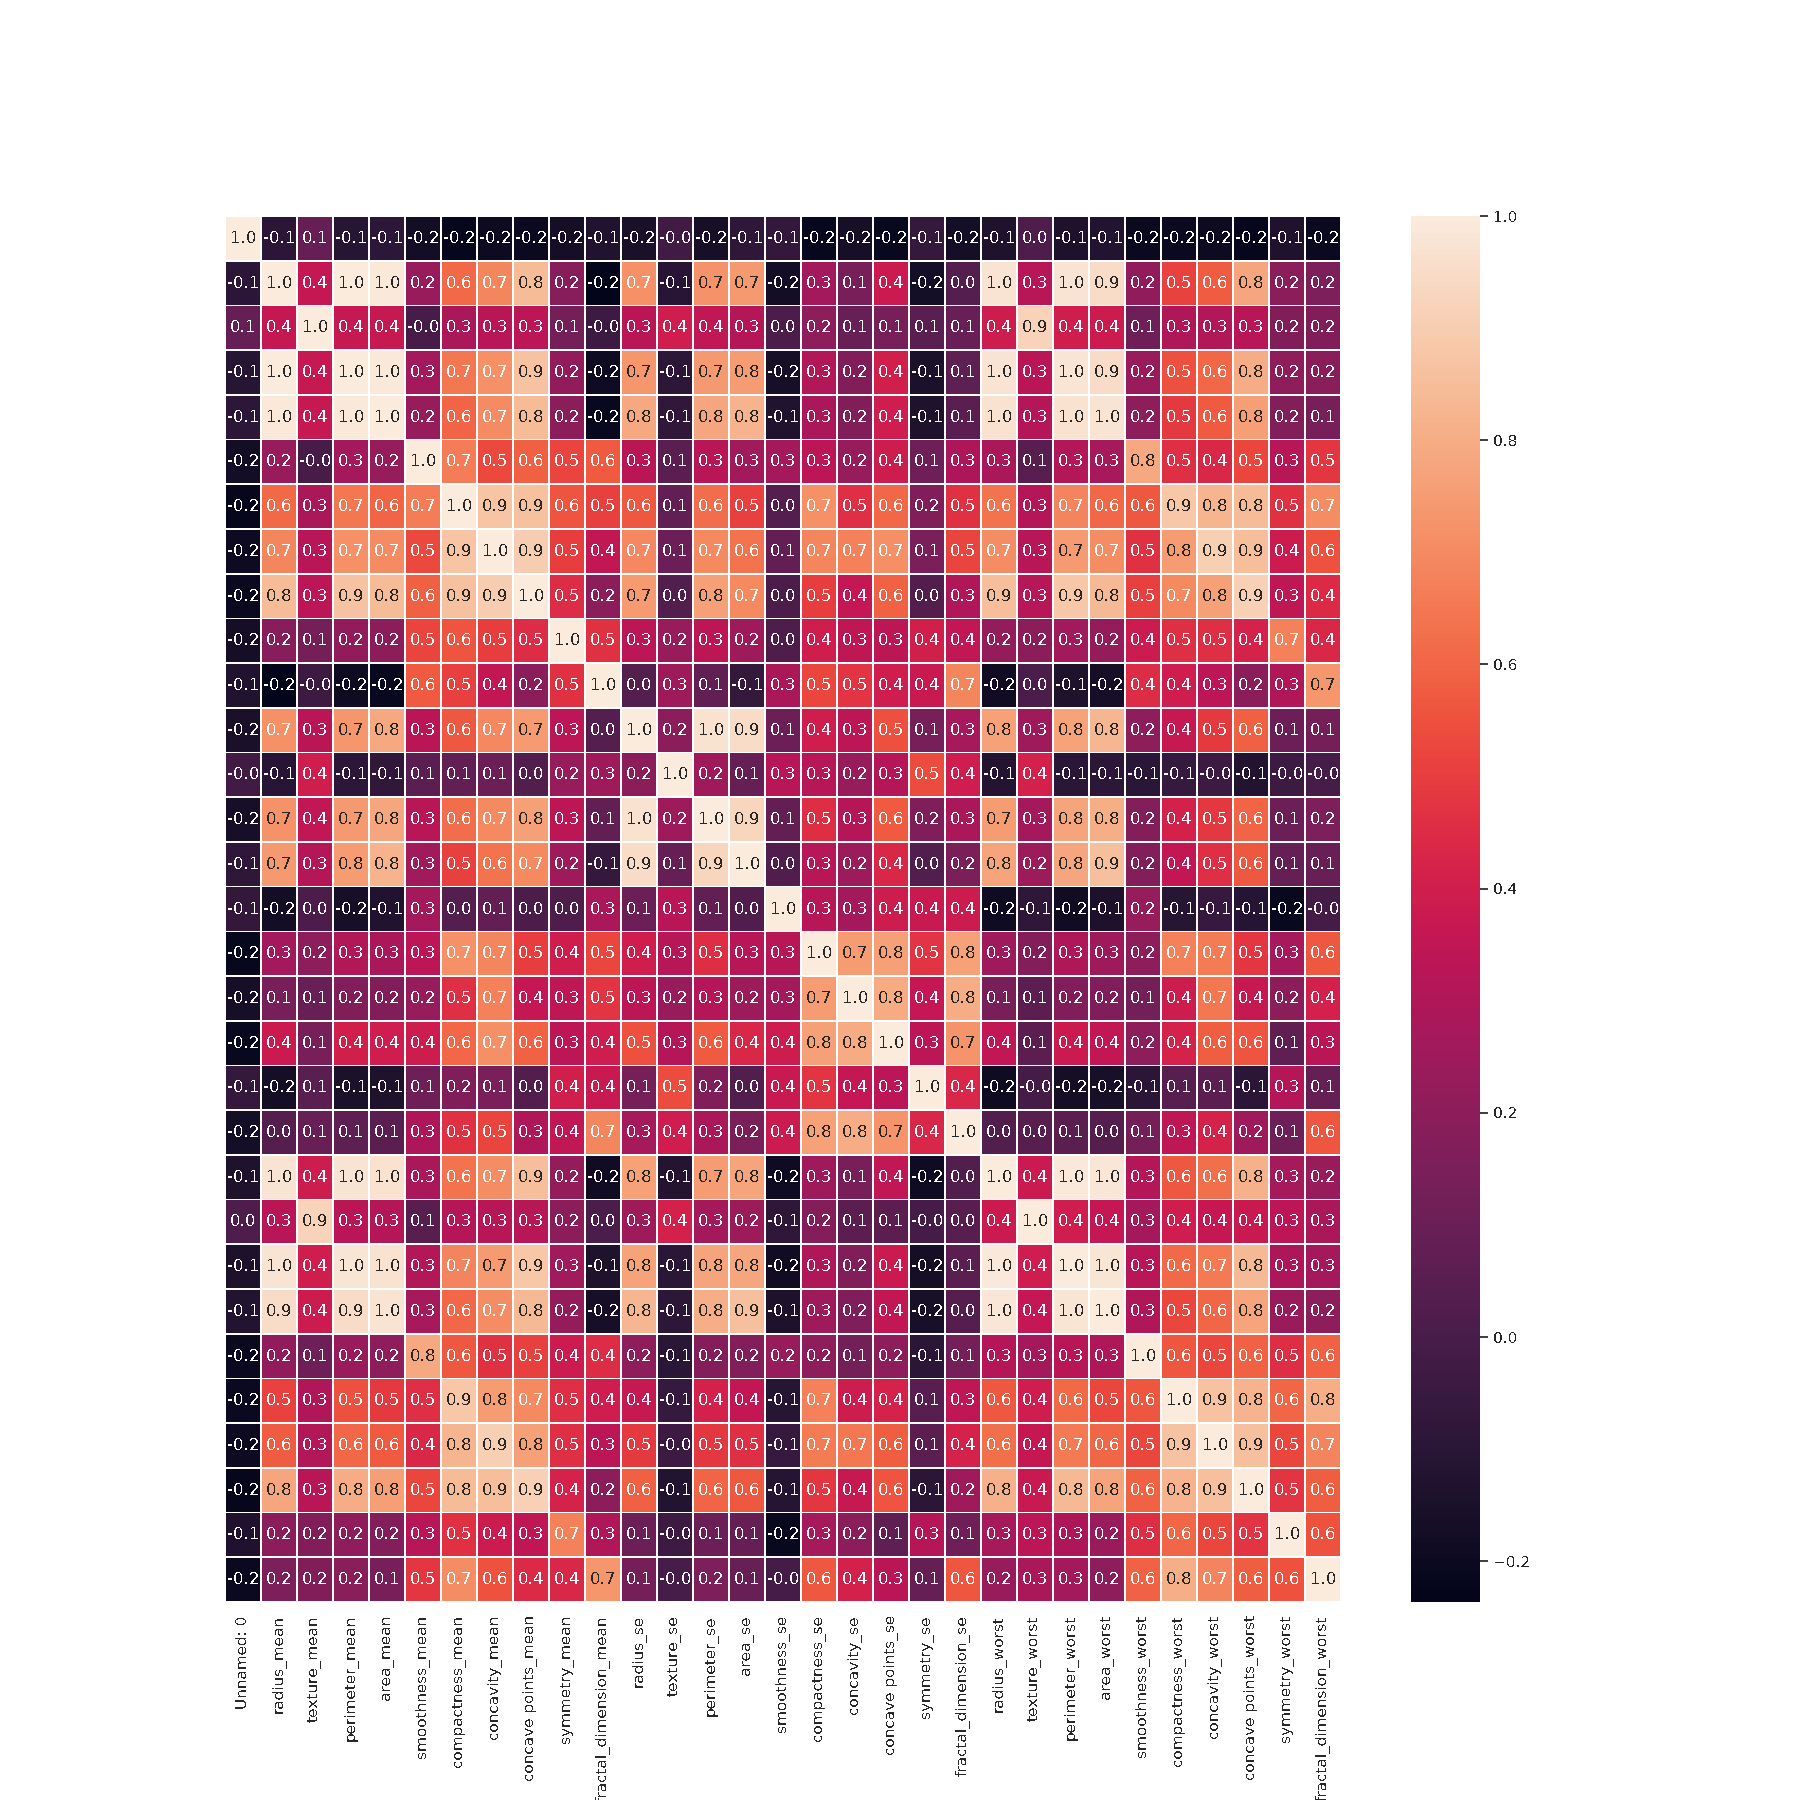

In [29]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.savefig("/data/plot.png")

In [32]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()
print(x_1.head().to_string())


OUTPUT:
   Unnamed: 0  texture_mean  area_mean  smoothness_mean  concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  area_se  smoothness_se  concavity_se  symmetry_se  fractal_dimension_se  smoothness_worst  concavity_worst  symmetry_worst  fractal_dimension_worst
0         451         25.00     1191.0          0.10320         0.16550         0.1663                 0.05391       1.375    56.18       0.011900       0.04907      0.01641              0.001807           0.15280           0.3977          0.2293                  0.06091
1         542         25.42      668.6          0.08275         0.04105         0.1840                 0.05680       1.385    27.41       0.004775       0.01947      0.01870              0.002626           0.10600           0.1611          0.2722                  0.06956
2          86         21.46      648.2          0.09444         0.12040         0.2075                 0.05636       2.220    38.87       0.009369       0.05371      0.02418  


OUTPUT:



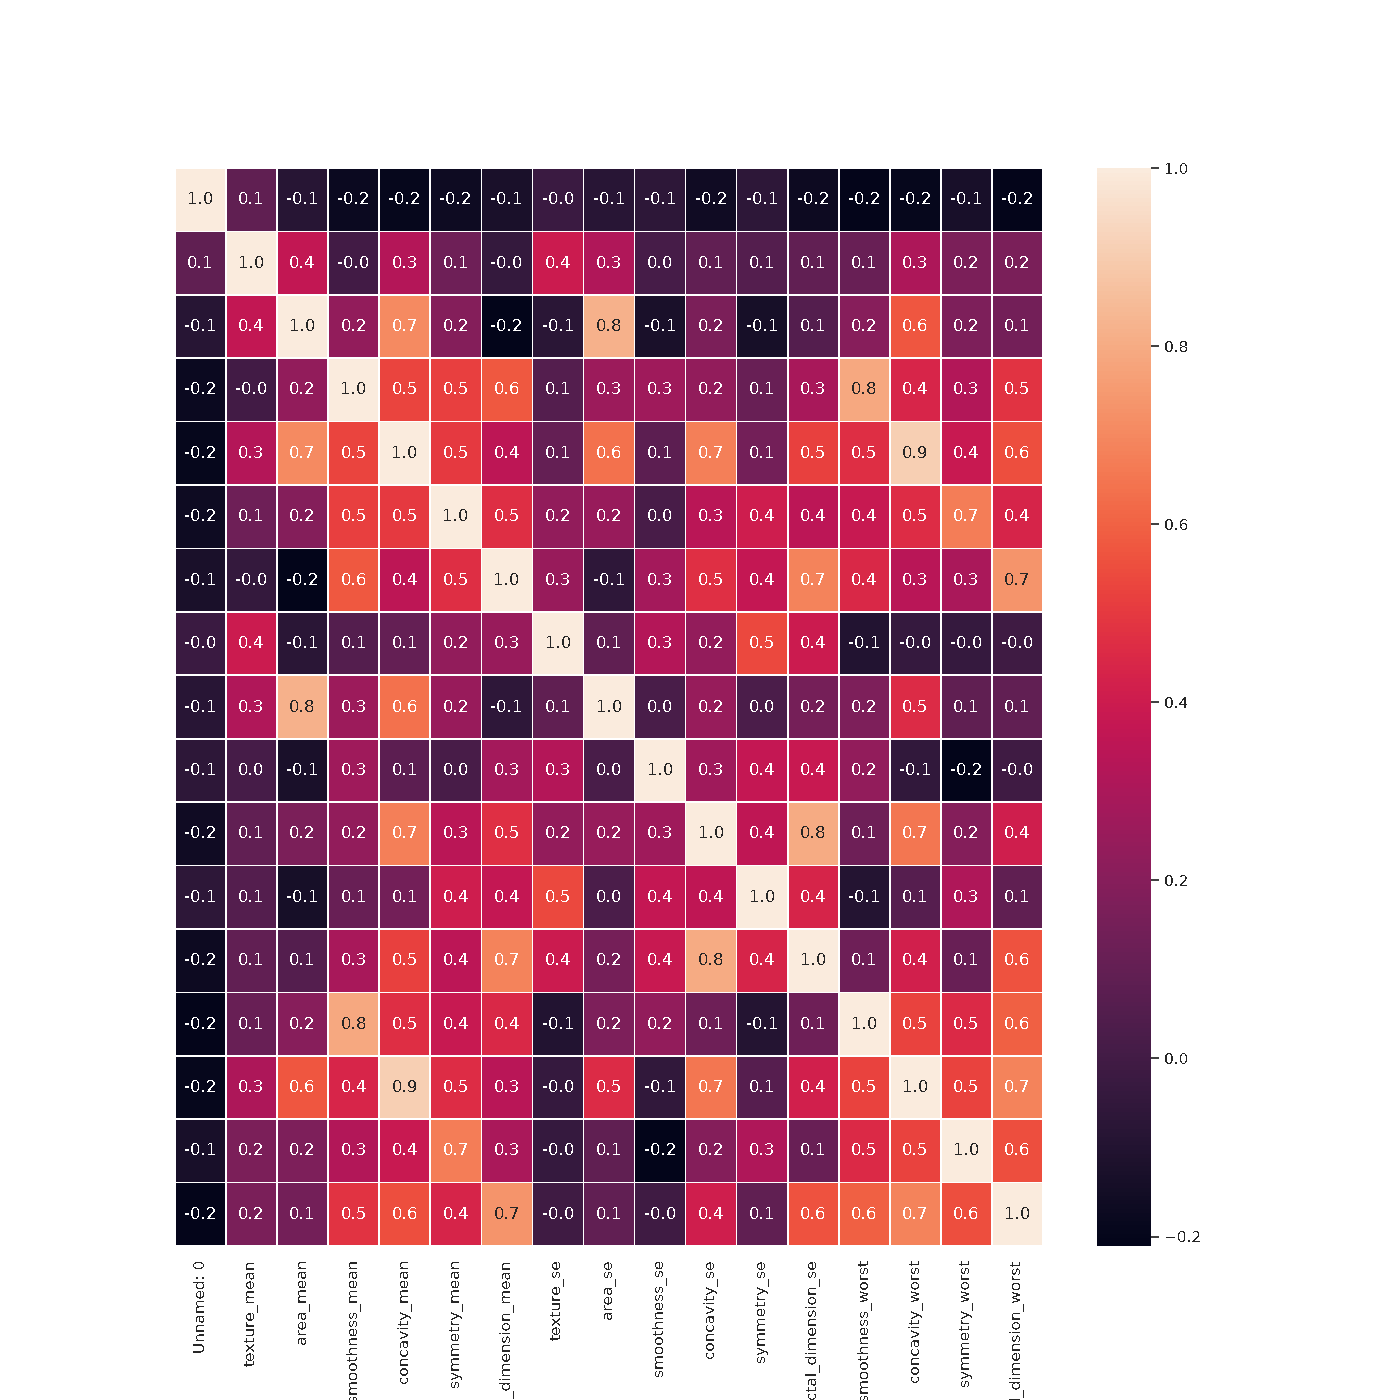

In [33]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.savefig("/data/plot.png")


OUTPUT:

ERRORMSG:
Traceback (most recent call last):
  File "<string>", line 12, in <module>
  File "/lib/pandas/core/frame.py", line 3943, in drop
    errors=errors)
  File "/lib/pandas/core/generic.py", line 3781, in drop
    obj = obj._drop_axis(labels, axis, level=level, errors=errors)
  File "/lib/pandas/core/generic.py", line 3813, in _drop_axis
    new_axis = axis.drop(labels, errors=errors)
  File "/lib/pandas/core/indexes/base.py", line 4966, in drop
    '{} not found in axis'.format(labels[mask]))
KeyError: "['5' '3' '8' '10' '13' '15' '23' '25' '28' '30' '18' '20' '24' '26'] not found in axis"


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)
